# Multiple Linear Regression

### Imamhussain Naikwade

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

In [2]:
#reading the dataset
kc_data = pd.read_csv("./kc_house_data.csv")

In [3]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#droping 'id','date' as it has no effect on price
kc_data.drop(['id','date'],axis = 1, inplace = True)

In [6]:
kc_data.shape

(21613, 19)

In [7]:
kc_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
kc_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
scaled_kc = pd.DataFrame(mmsc.fit_transform(kc_data),columns = kc_data.columns)

In [10]:
scaled_kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


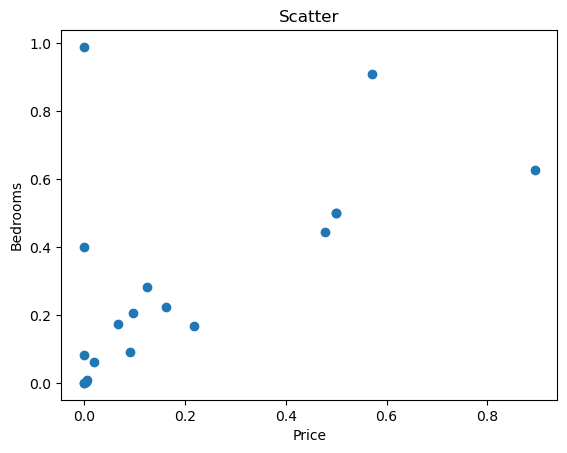

In [11]:
import matplotlib.pyplot as plt
plt.title("Scatter")
plt.scatter(scaled_kc.iloc[0],scaled_kc.iloc[1])
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.show()

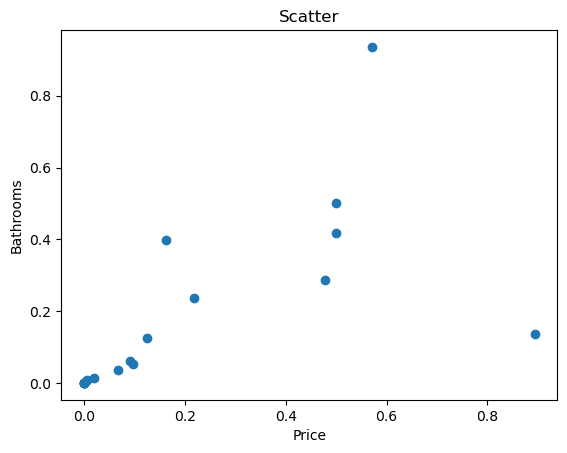

In [12]:
plt.title("Scatter")
plt.scatter(scaled_kc.iloc[0],scaled_kc.iloc[2])
plt.xlabel("Price")
plt.ylabel("Bathrooms")
plt.show()

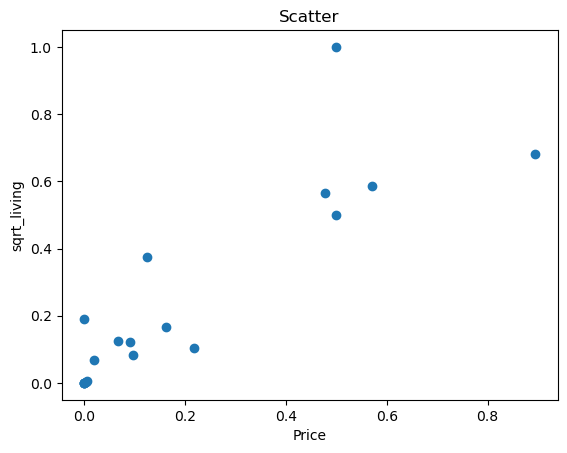

In [13]:
plt.title("Scatter")
plt.scatter(scaled_kc.iloc[0],scaled_kc.iloc[3])
plt.xlabel("Price")
plt.ylabel("sqrt_living")
plt.show()

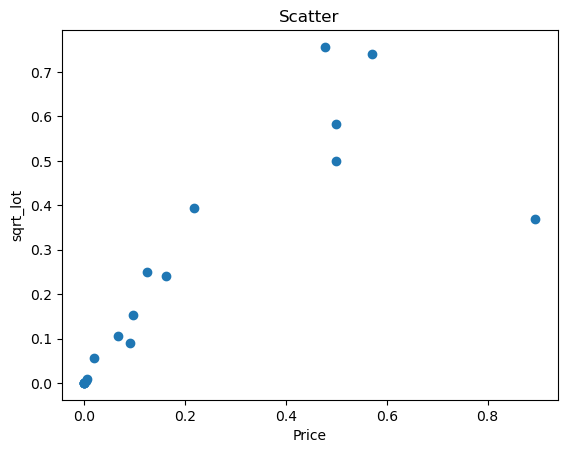

In [14]:
plt.title("Scatter")
plt.scatter(scaled_kc.iloc[0],scaled_kc.iloc[4])
plt.xlabel("Price")
plt.ylabel("sqrt_lot")
plt.show()

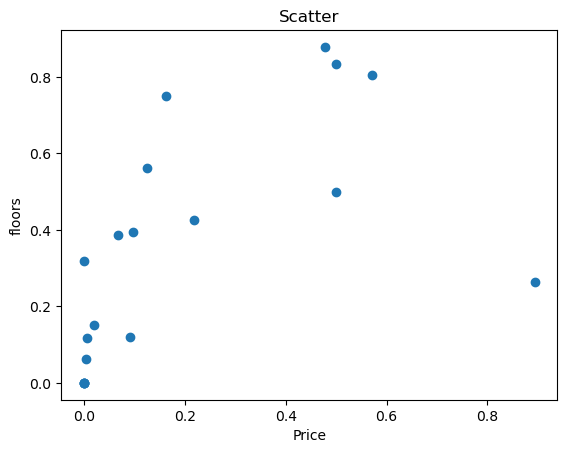

In [15]:
plt.title("Scatter")
plt.scatter(scaled_kc.iloc[0],scaled_kc.iloc[5])
plt.xlabel("Price")
plt.ylabel("floors")
plt.show()

In [16]:
#Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X = scaled_kc.iloc[:,1:]
mlr_x = sm.add_constant(X)
mlr_y = scaled_kc.iloc[:,0]

MLR_train_x,MLR_test_x,MLR_train_y,MLR_test_y = train_test_split(mlr_x,mlr_y,train_size = 0.8, random_state = 42)

In [17]:
#getting model summary
MLRmodel = sm.OLS(MLR_train_y,MLR_train_x).fit()
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2361.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:23:05   Log-Likelihood:                 38567.
No. Observations:               17290   AIC:                        -7.710e+04
Df Residuals:                   17272   BIC:                        -7.696e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0676      0.002    -31.283      0.000      -0.072      -0.063
bedrooms         -0.1486      0.009    -16.480      0.000      -0.166      -0.131
bathrooms         0.0468      0.004     12.351      0.000       0.039       0.054
sqft_living       0.1130      0.002     45.749      0.000       0.108       0.118
sqft_lot          0.0192      0.013      1.537      0.124      -0.005       0.044
floors            0.0023      0.001      1.769      0.077      -0.000       0.005
waterfront        0.0738      0.003     28.822      0.000       0.069       0.079
view              0.0281      0.001     22.734      0.000       0.026       0.031
condition         0.0129      0.001      9.470      0.000       0.010       0.016
grade             0.1488      0.004     39.853      0.000       0.142       0.156
sqft_above        0.1364      0.003     41.966      0.000       0.130       0.143
sqft_basement     0.0525      0.003     20.180      0.000       0.047       0.058
yr_built         -0.0404      0.001    -33.400      0.000      -0.043      -0.038
yr_renovated      0.0054      0.001      5.026      0.000       0.003       0.007
zipcode          -0.0143      0.001    -15.150      0.000      -0.016      -0.012
lat               0.0486      0.001     50.222      0.000       0.047       0.050
long             -0.0307      0.002    -13.324      0.000      -0.035      -0.026
sqft_living15     0.0162      0.003      5.565      0.000       0.010       0.022
sqft_lot15       -0.0372      0.009     -3.982      0.000      -0.056      -0.019
==============================================================================
Omnibus:                    14976.587   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1709551.373
Skew:                           3.633   Prob(JB):                         0.00
Kurtosis:                      51.168   Cond. No.                     6.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
#fitting dataset to model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, mlr_y)

LinearRegression()

### Predicting price of the house based on all the factors in dataset 

In [21]:
predicted_price = regr.predict([[0.09090909090909091,
 0.125,
 0.06716981132075472,
 0.003107510786939247,
 0.0,
 0.0,
 0.0,
 0.5,
 0.49999999999999994,
 0.09758771929824563,
 0.0,
 0.4782608695652186,
 0.0,
 0.8939393939393767,
 0.5714975068361099,
 0.21760797342193428,
 0.16193426260540356,
 0.005742353388493927]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
predicted_price

array([0.01755776])

In [23]:
#taking sample into input from 0th index
list(scaled_kc.iloc[0,1:])

[0.09090909090909091,
 0.125,
 0.06716981132075472,
 0.003107510786939247,
 0.0,
 0.0,
 0.0,
 0.5,
 0.49999999999999994,
 0.09758771929824563,
 0.0,
 0.4782608695652186,
 0.0,
 0.8939393939393767,
 0.5714975068361099,
 0.21760797342193428,
 0.16193426260540356,
 0.005742353388493927]

In [24]:
 price_sum = kc_data['price'].describe()

In [25]:
#De-scaling the predicted value
pridicted_price_descaled = (predicted_price*(price_sum[7]-price_sum[3]))+price_sum[3]
pridicted_price_descaled

array([208877.9462583])